Homework 10
In this homework, you are going to use the code from TrafficSignsClassification notebook and create your own traffic sign classifier.

Step 1
Use the data from data/subset_homework folder and visualize some examples. How many images are there for each class?

Step 2
Run the training with one single neuron (as we did in the lecture). What accuracy can you achieve?

Step 3
Make further modifications to improve the accuracy (e.g. add more neurons, more layers, etc.). What is the maximum accuracy you can achieve?

In [105]:
import pickle
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

In [106]:
# Loading the data from a pickle file
with open('subset_homework.pckl', 'rb') as file:
    data = pickle.load(file)

    print(data.keys())

dict_keys(['class_id_0', 'class_id_1'])


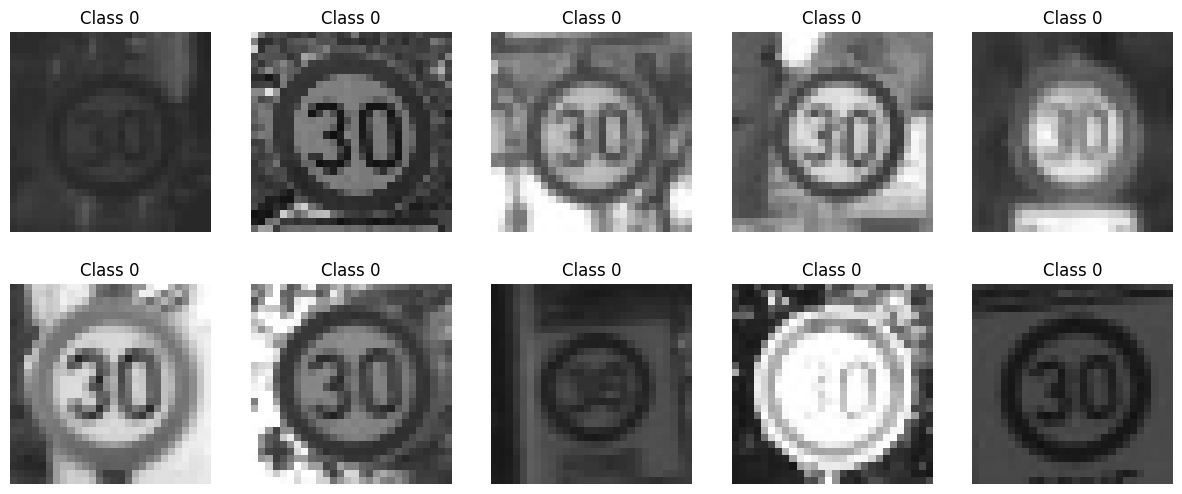

In [107]:
# Extracting and labeling images for class 0
images_0 = data['class_id_0']
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2, 5, cnt + 1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(f"Class {labels_0[idx]}")
    plt.axis(False)


**How many images are there for each class?**


class_0: 2220

class_1: 2250

A balanced dataset with almost the same number of images for each class

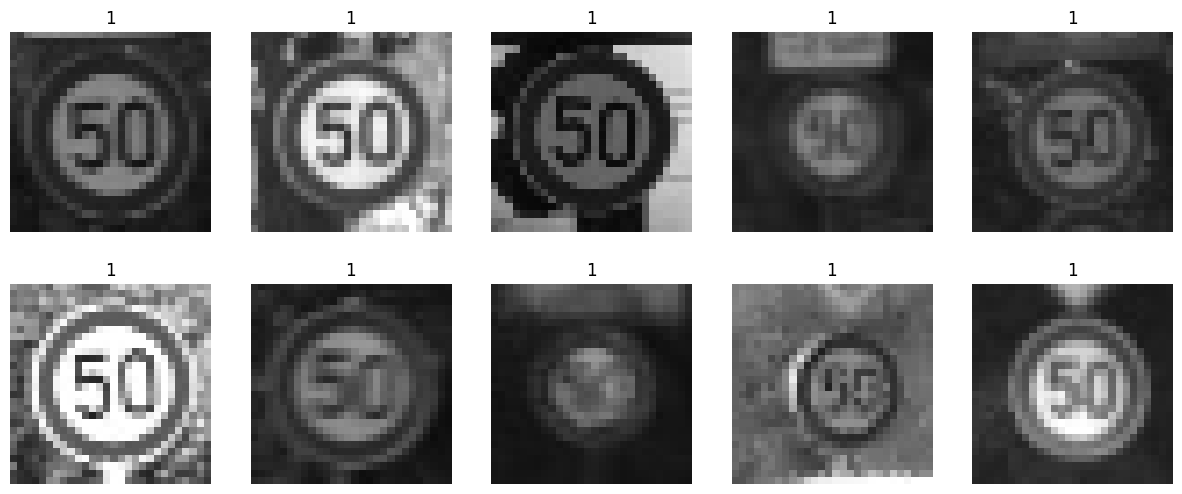

In [108]:
# Extracting and labeling images for class 1
images_1 = data['class_id_1']
labels_1 = [1] * len(images_1)


for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [109]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


In [110]:
# Combining images and labels from both classes and shuffling the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


In [111]:
# Flattening and normalizing pixel values to range [0, 1]
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.04521584510803223


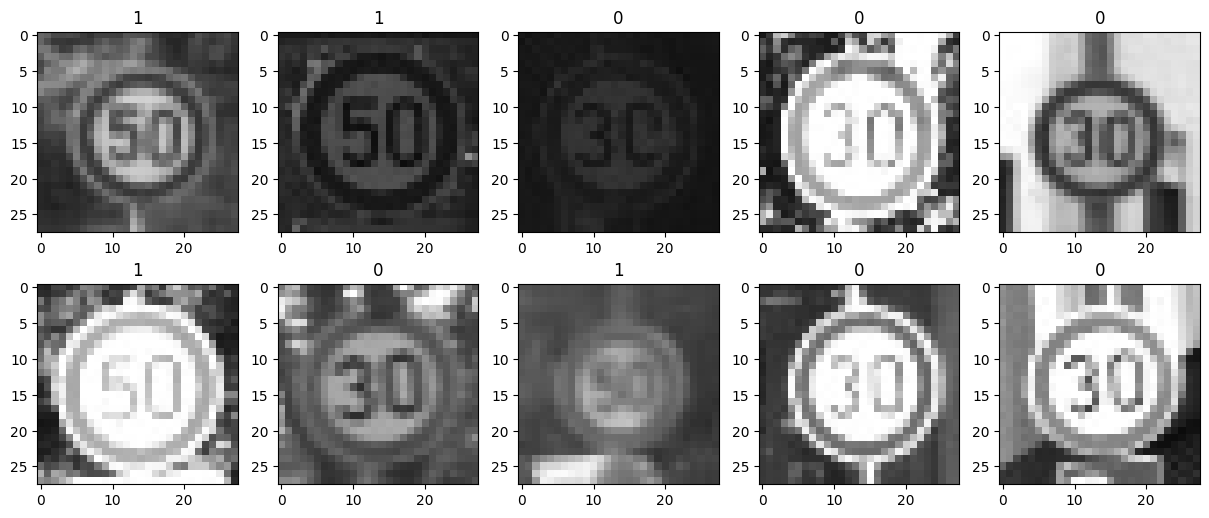

In [113]:
# Visualizing 10 random samples from the shuffled dataset
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

In [114]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

In [115]:
# Defining the layers of the model
inputs = Input(shape=(pixels.shape[1],))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │             785 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

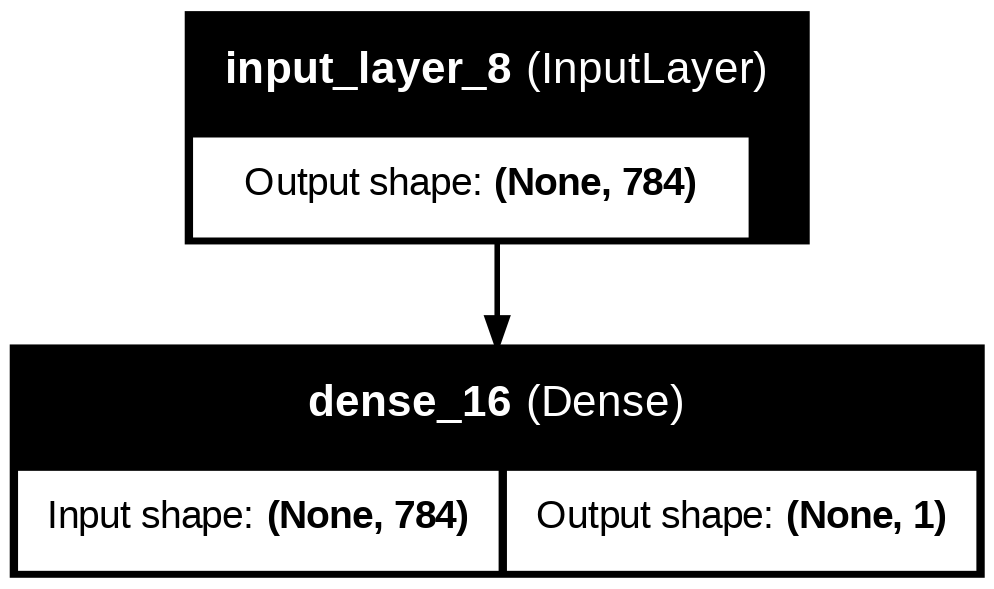

In [116]:
# Plotting the model
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [117]:
# Compiling the model with Adam optimizer and Mean Squared Error loss
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [135]:
# Training the model for 10 epochs with a batch size of 32
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9718 - loss: 0.0872
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9799 - loss: 0.0595
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9842 - loss: 0.0439
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9817 - loss: 0.0509
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9638 - loss: 0.0947
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9704 - loss: 0.0898
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9803 - loss: 0.0493
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9779 - loss: 0.0639
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9874 - loss: 0.0337
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9818 - loss: 0.0442


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

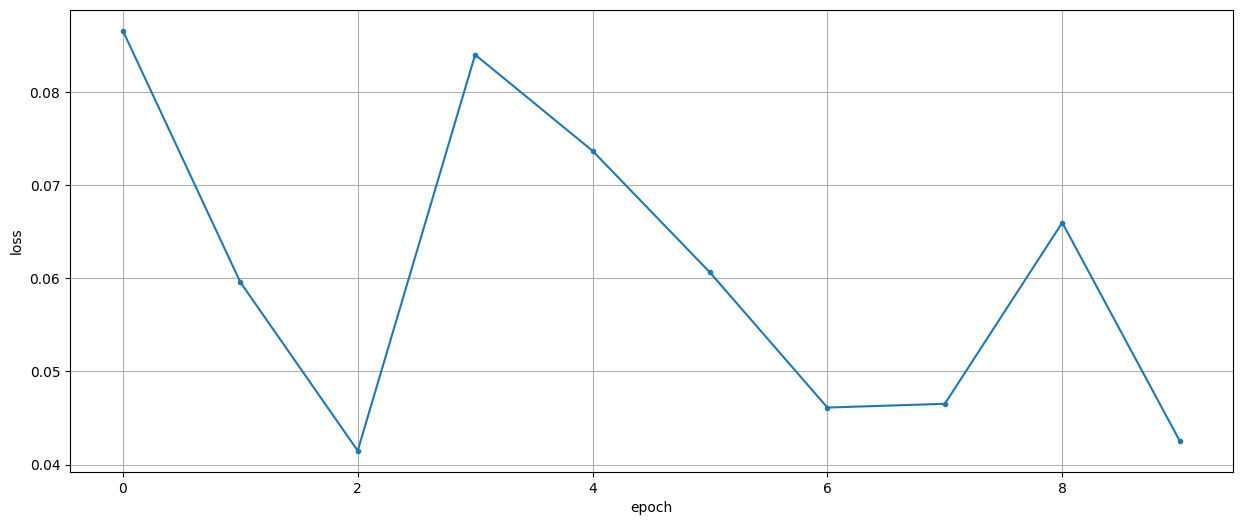

In [138]:
# Plotting the loss over epochs
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[0.40474513] [0.40474513]


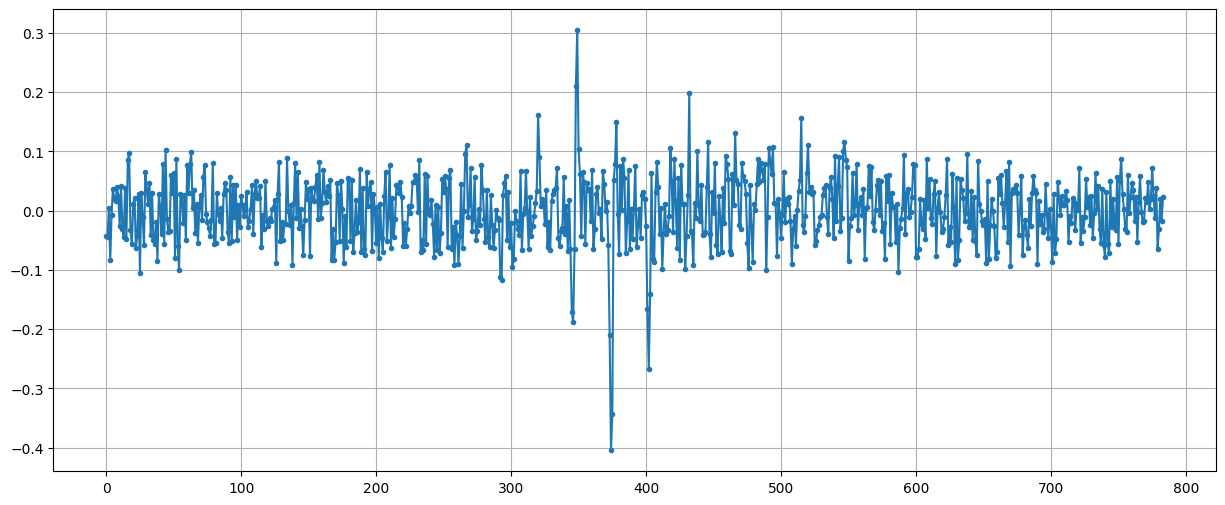

In [120]:
# Visualizing the weights learned by the model
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

In [121]:
# Making a prediction
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[0.3626351]] 0


In [122]:
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [123]:
# Calculating accuracy of predictions
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9174496644295302


**What accuracy can you achieve?**

92% with only 1 layer and 10 epoch is a very good result in my opinion - cheap and fast.

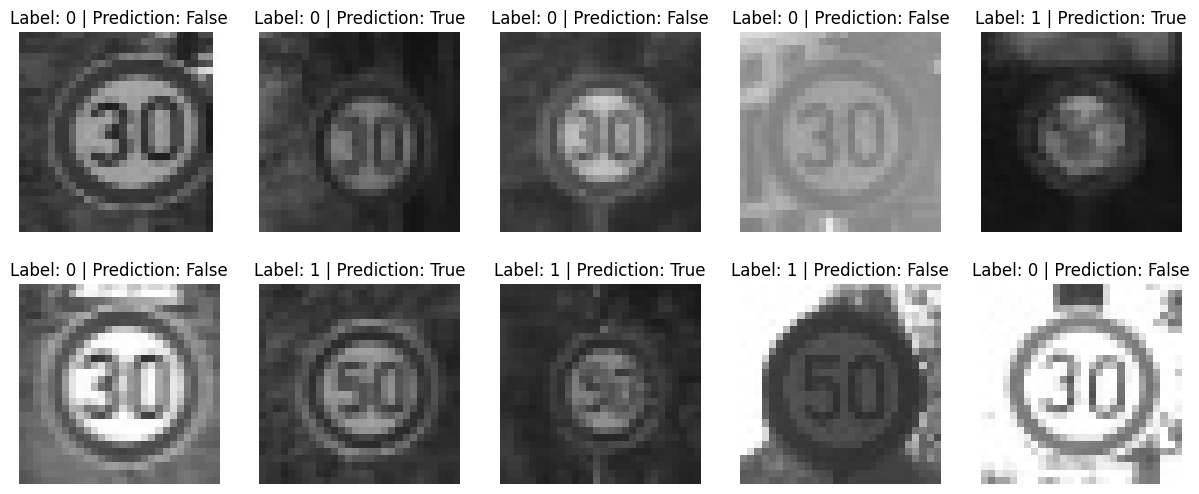

In [124]:
# Visualizing predictions with true labels
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

**Improved model**

In [125]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [126]:
# Splitting data into training and test sets
pixels_train, pixels_test, labels_train, labels_test = train_test_split(pixels, labels, test_size=0.2, random_state=1)

In [127]:
# Defining the improved model with additional layers
inputs = Input(shape=(pixels.shape[1],))
x = Dense(128, activation="relu")(inputs)  # First hidden layer with 128 neurons
x = Dense(64, activation="relu")(x)       # Second hidden layer with 64 neurons
x = Dense(32, activation="relu")(x)       # Third hidden layer with 32 neurons
outputs = Dense(1, activation="sigmoid")(x)  # Output layer with sigmoid activation for binary classification

model = Model(inputs, outputs)
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,849 (433.00 KB)

 Trainable params: 110,849 (433.00 KB)

 Non-trainable params: 0 (0.00 B)

In [128]:
# Compiling the model with binary crossentropy loss and accuracy metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [133]:
# Training the model for more epochs
history = model.fit(pixels_train, labels_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9788 - loss: 0.0604 - val_accuracy: 0.9665 - val_loss: 0.1120
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9862 - loss: 0.0423 - val_accuracy: 0.9609 - val_loss: 0.1218
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9841 - loss: 0.0433 - val_accuracy: 0.9497 - val_loss: 0.1359
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9738 - loss: 0.0657 - val_accuracy: 0.9637 - val_loss: 0.1144
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9904 - loss: 0.0323 - val_accuracy: 0.9330 - val_loss: 0.2392
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9616 - loss: 0.1189 - val_accuracy: 0.9302 - val_loss: 0.2181
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9890 - loss: 0.0390 - val_accuracy: 0.8254 - val_loss: 0.5816
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9450 - loss: 0.1417 - val_accuracy: 0.9581 - val_loss

In [134]:
predictions = (model.predict(pixels_test) > 0.5).astype(int).squeeze()

print(accuracy_score(labels_test, predictions))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.9697986577181208


I dont think that 0,05 of improvement matters greatly

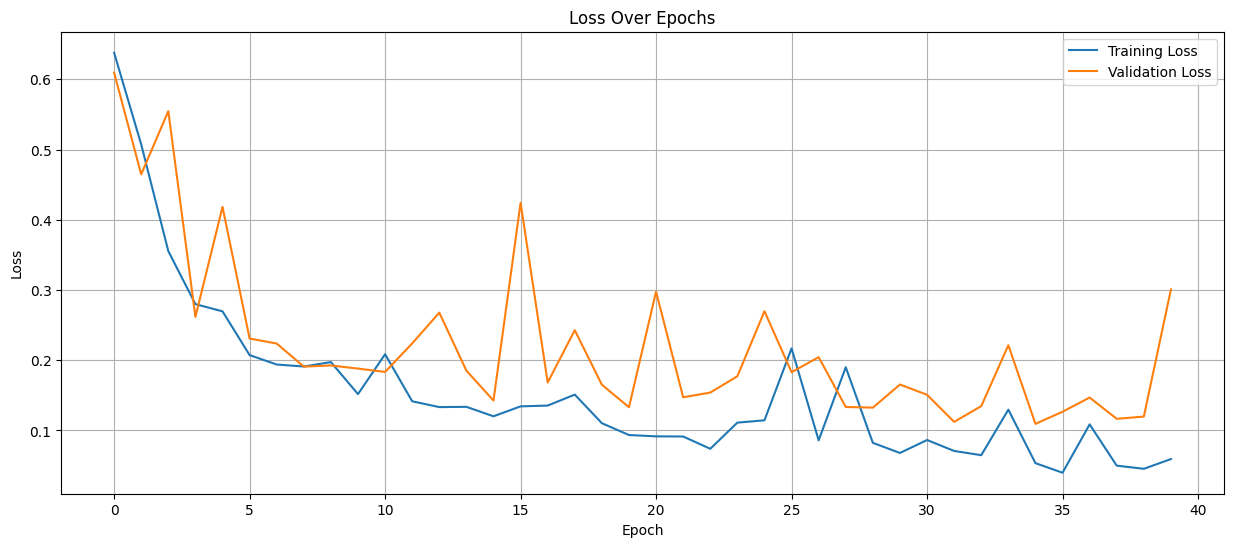

In [131]:
# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Loss Over Epochs')
plt.show()

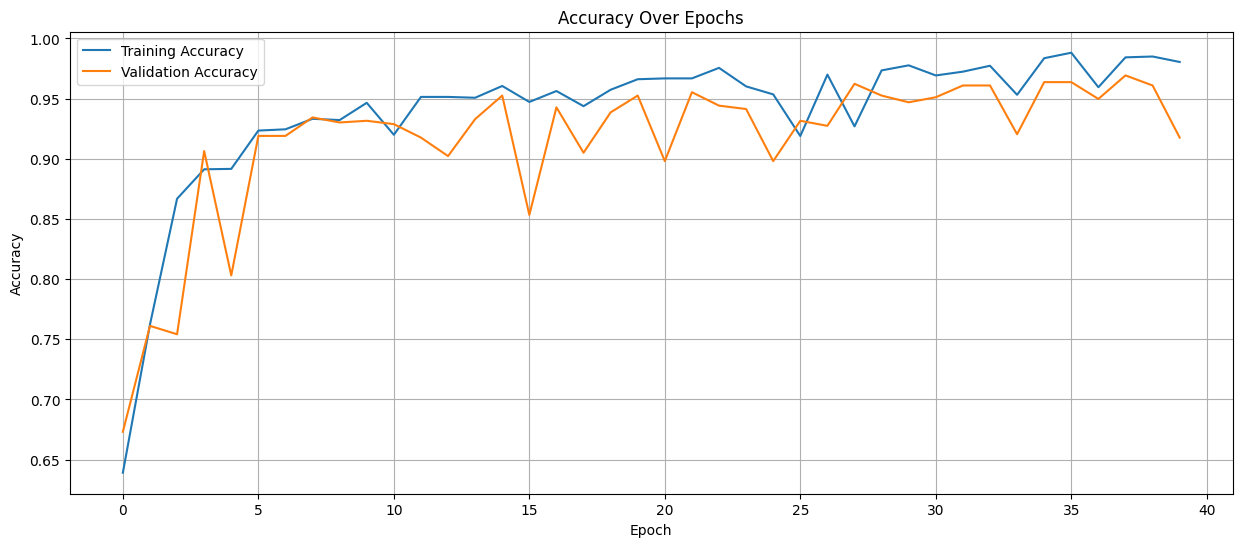

In [132]:
# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Accuracy Over Epochs')
plt.show()